# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

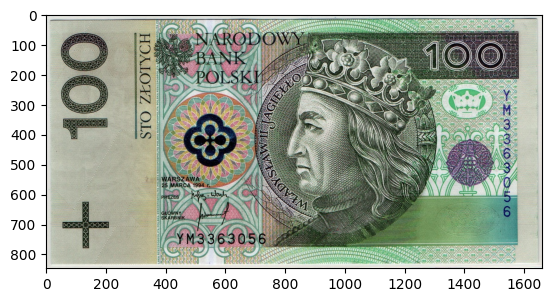

In [2]:
image = cv2.imread('100zloty.jpg')
plt.imshow(image)
plt.show()

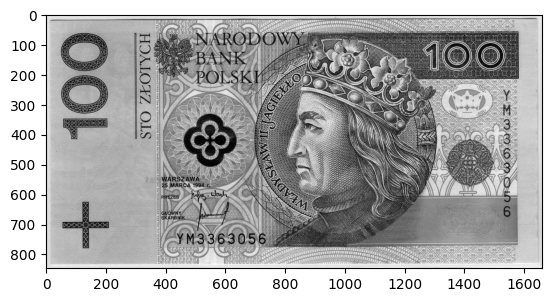

In [3]:
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(img)
plt.gray()
plt.show()

### Dekompozycja

In [8]:
def show_image(img):
    plt.imshow(img)
    plt.show()

def decompose(img):
    k = 1
    img_list = []
    for i in range(8):
        bit_img = img & k
        show_image(bit_img)
        img_list.append(bit_img)
        k <<= 1
    return img_list[::-1]


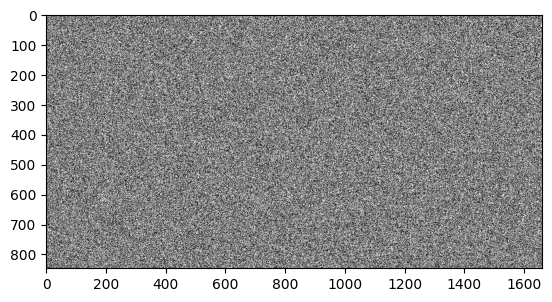

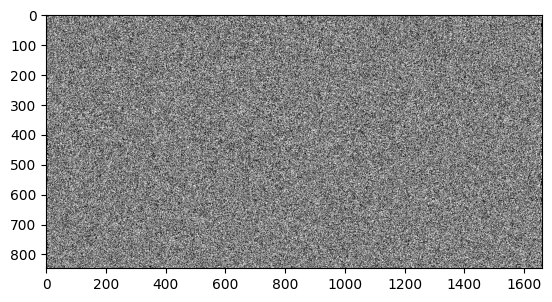

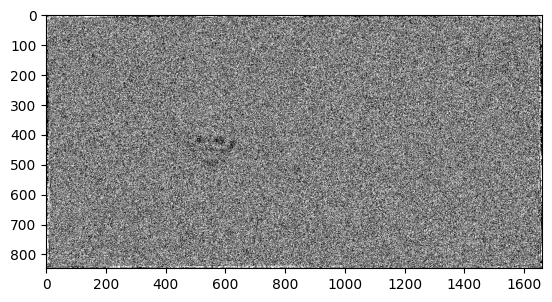

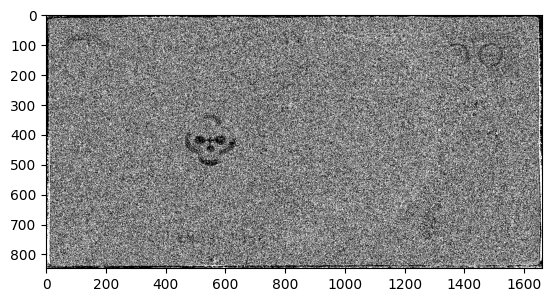

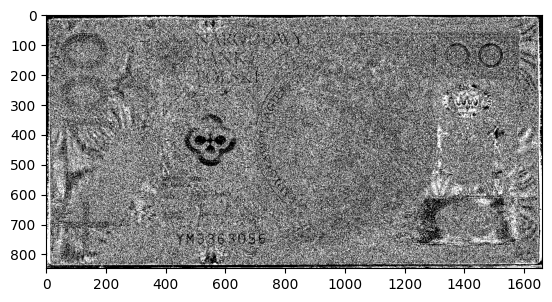

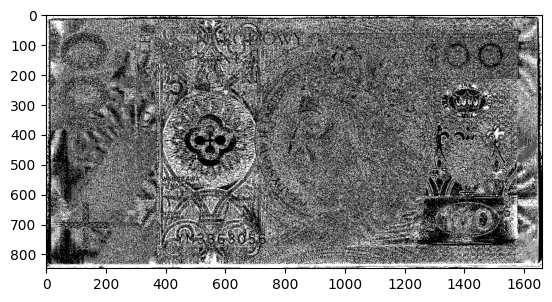

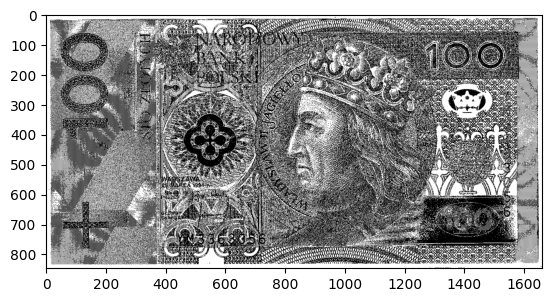

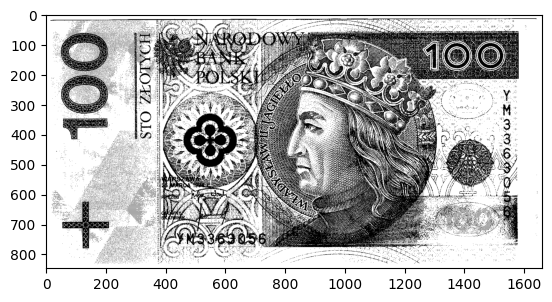

In [9]:
img_list = decompose(img)

### Rekonstrukcja

In [6]:
def binarize_matrix(img):
    maks = np.max(img)
    zero = np.min(img)
    img[img == maks] = 1
    img[img == zero] = 0
    return img


def assemble_image(img_list, k):
    img_list = list(map(binarize_matrix, img_list))
    bit = 1 << 7
    img = img_list[0] * bit
    show_image(img)
    for i in range(1, k):
        bit >>= 1
        img |= img_list[i] * bit
        show_image(img)


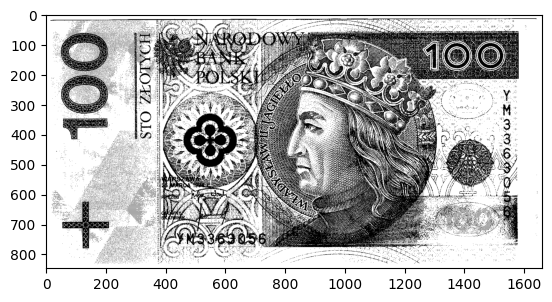

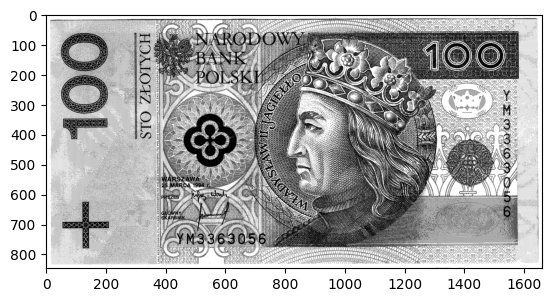

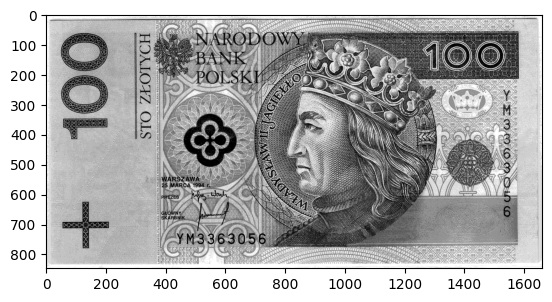

In [7]:
assemble_image(img_list, 3)